## Tratamiento de los datos

In [57]:
import pandas as pd
import json
from pandas import json_normalize
import ast
import datetime
import numpy as np

Al descargar los archivos json.gz me daban muchos erores de codificación entonces, mejor utilize la herramienta win rar y trabaje con los archivos json descomprimidos. Los archivos originales se peuden en contrar en https://github.com/soyHenry/PI_ML_OPS.git

In [55]:
#Abrir el archivo json de steam games
data_steam_games=[]

with open('aoutput_steam_games.json') as f:
    for line in f:
        data_steam_games.append(json.loads(line))

In [115]:
#Convertimos nuestros datos en un DataFrame de pandas
df_steam_games=pd.DataFrame(data_steam_games)

In [116]:
#Vemos la información del nuevo DataFrame
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


In [117]:
#Visualizamos la tabla para ver como quedaron acomodados nuestros datos
df_steam_games.dropna().head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd


In [118]:
df_steam_games[df_steam_games["id"].isnull()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88384,NaN,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,NaN,NaN,19.99,False,NaN,NaN


De games solo utilizare las columnas "genres", "app_name", "release_date", "id". Las columnas de "publisher", "url", "tags", "specs", "price", "early acces" y "developer" no los ocuparé para las funciones de la API. la columna de titulo tiene datos nulos (20 mil valores), por lo que únicamente utilizaré la de "app_name" ademas de que dropeare los nulos de ID ya que son filas enteras de nulos y el unico titulo que sale sin ID no se encuentra tampoco en reviews, por lo que sera complicado de recomendar. De igual manera quite las filas que no tengan genero ya que no se podran buscar posteriormente en las funciones de la api

In [119]:
#Borramos columnas no relevantes a la API

df_steam_games_clean=df_steam_games.drop(["publisher","title","url","tags","reviews_url","price","specs","early_access","developer"],axis=1).dropna()


In [120]:
df_steam_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28832 entries, 88310 to 120443
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28832 non-null  object
 1   app_name      28832 non-null  object
 2   release_date  28832 non-null  object
 3   id            28832 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [122]:
#cambiando el tipo de dato a fecha se encuentra un error, ya que algunas fechas tienen "soon..." dando a entender 
#que todavía falta por salir
df_steam_games_clean["release_date"]=pd.to_datetime(df_steam_games_clean["release_date"],errors="coerce")

C:\Users\zaiko\AppData\Local\Temp\ipykernel_34932\776806425.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_steam_games_clean["release_date"]=pd.to_datetime(df_steam_games_clean["release_date"],errors="coerce")


In [123]:
df_steam_games_clean.dropna(inplace=True)
df_steam_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28658 entries, 88310 to 120443
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28658 non-null  object        
 1   app_name      28658 non-null  object        
 2   release_date  28658 non-null  datetime64[ns]
 3   id            28658 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ MB


In [125]:
#La API solo necesitara los años, las fechas exactas no. Entonces doy formato a "release_date"
df_steam_games_clean["release_date"]=df_steam_games_clean["release_date"].dt.strftime("%Y")

In [126]:
df_steam_games_clean.head()

,genres,app_name,release_date,id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,761140
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,643980
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,670290
88313,"[Action, Adventure, Casual]",弹炸人2222,2017,767400
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018,772540


Finalizamos con guardar el archivo como un CSV

In [127]:
df_steam_games_clean.to_csv("../MLOPs/src/steam_games.csv",sep="|")

continuamos con el ETL de la tabla de reviews, incluye los comentarios sobre los juegos y donde realizaremos un Feautre Engineering al crear una nueva columna con base a los sentimientos que se hayan encontrado.

In [70]:
data_reviews=[]

with open("australian_user_reviews.json","r",encoding="utf-8") as f:
    for line in f.readlines():
        data_reviews.append(ast.literal_eval(line))


In [71]:
df_reviews=pd.DataFrame(data_reviews)

In [72]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [73]:
df_reviews.head() #Reviso mi DF como quedó organizada, la columna de "reviews" se tendrá que desanidar

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [74]:
#desanidar la columna reviews
#rompemos la lista de cada valor de la columna "reviews" del dataframe en un nuevo dataframe.
df_reviews_exploded = df_reviews.explode('reviews')

#Realizamos una concatenación con el dataframe original y el nuevo dataframe creado. De igual manera se elimina la columna "reviews" del dataframe original
df_reviews_unnested = pd.concat([df_reviews_exploded.drop(['reviews'], axis=1), df_reviews_exploded['reviews'].apply(pd.Series)], axis=1)

In [75]:
df_reviews_unnested.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN


In [76]:
df_reviews_unnested.info() #La columna 0 no contiene ningun dato, unicamente datos nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59333 entries, 0 to 25798
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      59333 non-null  object 
 1   user_url     59333 non-null  object 
 2   funny        59305 non-null  object 
 3   posted       59305 non-null  object 
 4   last_edited  59305 non-null  object 
 5   item_id      59305 non-null  object 
 6   helpful      59305 non-null  object 
 7   recommend    59305 non-null  object 
 8   review       59305 non-null  object 
 9   0            0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 5.0+ MB


In [77]:
df_reviews_unnested[0].isna().sum() 
#Y la suma de las filas con datos nulos de esa columna suma el total de las filas por lo que sera mejor borrarla

59333

De esta tabla solo ocupare las columnas "user_id" para identificar al usuario con sus horas de juego, el "item_id" 
para saber de que juego está hablando, "review" para hacer el Feauture Engineering y "recomend" para saber que usuarios recomiendan este juego. El resto de columnas no encontré alguna necesidad de utilizarlas, ya que user_url no me ayudara a saber si hay una recomendación, la columna funny solo me dice que usuarios encontraron divertida la review, la última fecha de edición del comentario igualmente no me dice nada y la columna helpful solo es para que los usuarios indiquen si les sirvió esa review.

In [78]:
df_reviews_clean=df_reviews_unnested.drop(["user_url","funny","posted","last_edited","helpful",0],axis=1)
df_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59333 entries, 0 to 25798
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59333 non-null  object
 1   item_id    59305 non-null  object
 2   recommend  59305 non-null  object
 3   review     59305 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


Iniciamos el Enginnering feauture

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [80]:
df_reviews_clean["sentiment_analysis"]=0
df_reviews_clean

,user_id,item_id,recommend,review,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,0
0,76561197970982479,22200,True,It's unique and worth a playthrough.,0
0,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,0
1,js41637,251610,True,I know what you think when you see this title ...,0
1,js41637,227300,True,For a simple (it's actually not all that simpl...,0
...,...,...,...,...,...
25797,76561198312638244,70,True,a must have classic from steam definitely wort...,0
25797,76561198312638244,362890,True,this game is a perfect remake of the original ...,0
25798,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,0
25798,LydiaMorley,730,True,:D,0


In [100]:
#Esta funcion puede ser usada en un .apply para una columna de un dataframe.
def sentiment_score(sentence):
    sia=SentimentIntensityAnalyzer()
    score=sia.polarity_scores(sentence)
    if sentence=="":
        return 1
    
    elif score['compound'] >= 0.33 :
         return 2
    
    elif score['compound'] <= - 0.33 :
        return 0
   
    else :
        print("Neutral")
        return 1

In [82]:
#damos formato a la columna "review"
df_reviews_clean['review'] = df_reviews_clean['review'].astype('str')

In [101]:
#aplicamos la funcion de analisis de sentimeintos para obtener la nueva columna
df_reviews_clean["sentiment_analysis"]=df_reviews_clean["review"].apply(sentiment_score)

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral


In [107]:
df_reviews_clean[df_reviews_clean["sentiment_analysis"]==0]

,user_id,item_id,recommend,review,sentiment_analysis
2,evcentric,248820,True,A suitably punishing roguelike platformer. Wi...,0
5,Wackky,207610,True,"It reminds me of that TV Show called ""The Walk...",0
8,76561198089393905,72850,True,"Killed the Emperor, nobody cared and got away ...",0
14,DJKamBer,1250,True,"Compared to Left 4 Dead 2, this game REALLY gi...",0
21,starkillershadow553,242130,True,"If you're looking for a no frills, Arcade/Simu...",0
...,...,...,...,...,...
25747,76561198222628548,370240,False,"This is just simply Horrible, I always lag and...",0
25753,112367263762,730,True,Can't count how many times i rage quitted onl...,0
25769,72947282842,730,True,Prettyy Mad Game,0
25772,iwishihadaids,391460,False,Bad,0


In [110]:
#como indicaron borramos la columna con los comentarios
df_reviews_clean=df_reviews_clean.drop("review", axis=1)

Esta tabla contiene unicamente el id del usuario, el id del juego, si se recomienda y la columna de sentimiento

In [111]:
df_reviews_clean.head()

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
0,76561197970982479,22200,True,1
0,76561197970982479,43110,True,2
1,js41637,251610,True,2
1,js41637,227300,True,2


In [ ]:
#Guardo mis archivos a un csv para un mejor uso
df_reviews_clean.to_csv("../MLOPs/src/reviews.csv",sep="|")

Continuamos con la tabla mas grande, la tabla de items que contiene las horas de juego de cada  usuario de cada juego que tiene...

In [85]:
data_items=[]

with open("australian_users_items.json","r",encoding="utf-8") as f:
    for line in f.readlines():
        data_items.append(ast.literal_eval(line))

In [86]:
df_items=pd.DataFrame(data_items)

la columna de "items" tenemos que desanidarla

In [87]:
df_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [88]:
df_items.info() #de 88 mil filas se hará mas grande...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [89]:
df_items["items_count"].sum() #este es un estimado de las filas qeu tendremos al desanidar

5153209

In [90]:
#rompemos cada lista de la columna "items" del dataframe en uno nuevo
df_items_exploded = df_items.explode('items')

#Realizamos una concatenación con el dataframe original y el nuevo dataframe creado. De igual manera se elimina la columna
#"reviews" del dataframe original
df_items_unnested = pd.concat([df_items_exploded.drop(['items'], axis=1), df_items_exploded['items'].apply(pd.Series)], axis=1)

In [91]:
df_items_unnested.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks,0
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0,NaN
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0,NaN
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0,NaN
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0.0,0.0,NaN
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0.0,0.0,NaN


el resultado era el esperado peusto que hay usuarios qeu tienen una gran variedad de juegos y horas acumuladas en cada uno...

In [92]:
df_items_unnested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170015 entries, 0 to 88309
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          object 
 3   user_url          object 
 4   item_id           object 
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
 8   0                 float64
dtypes: float64(3), int64(1), object(5)
memory usage: 394.4+ MB


Supongo que la columna 0 solo tiene NaN, pero verificamos

In [93]:

df_items_unnested[0].isna().sum() #la suma de los datos nulos es igual a las filas que tengo

5170015

se borra la columna "0" ya que no contiene datos mas que nulos

In [94]:

df_items_unnested.drop(0,axis=1, inplace=True)

In [95]:
df_items_unnested

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0.0,0.0
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0.0,0.0
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3.0,3.0
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4.0,4.0
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,519140,Minds Eyes,3.0,3.0


De esta tabla solo nos importa las columnas "user_id" para indicar al usuario, "item_id" identificar el juego que se jugo X cantidad de horas y 
"playtime_forever" para revisar el iempo jugado y poder realizar las consultas. Las demás columnas no la usaré, por ejemplo "items_count" solo me dice cuantos juegos son los
que se registraron, "user_url" es una liga hacia el perfil del usuario, por lo tanto no la usaré, la columna de playtime_2weeks es el tiempo de juego por semana, quitare nulos
#para reducir la cantidad de filas

In [96]:
df_items_clean=df_items_unnested.drop(["items_count","user_url","playtime_2weeks"],axis=1).dropna()
df_items_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5153209 entries, 0 to 88308
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   steam_id          object 
 2   item_id           object 
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), object(4)
memory usage: 235.9+ MB


La siguiente linea nos ayuda a confirmar que algunos juegos no tienen "release_date" y en está tabla podemos confirmar que nadie ha acumulado horas de juego.

In [97]:
df_items_clean[df_items_clean["item_id"]==768570]

,user_id,steam_id,item_id,item_name,playtime_forever


In [112]:
#Guardo mis archivos a un csv para un mejor uso
df_items_clean.to_csv("../MLOPs/src/items.csv",sep="|")

Debido a que Github solo puede cargar archivos de 100 mb recortare el archivo de items_csv y quitare el archivo australian_users_item.json de la carpeta para poder hacer el deploy

In [51]:
df_items=pd.read_csv("src\items.csv",sep="|")

In [65]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   user_id           object 
 2   steam_id          int64  
 3   item_id           int64  
 4   item_name         object 
 5   playtime_forever  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 235.9+ MB


In [60]:
#escogemos indices aleatorios para borrar filas
random_index=np.random.choice(df_items.index,size=3436000,replace=False)

In [63]:
#borramos las filas
df_items_shortened=df_items.drop(random_index)

In [64]:
df_items_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717209 entries, 2 to 5153206
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   user_id           object 
 2   steam_id          int64  
 3   item_id           int64  
 4   item_name         object 
 5   playtime_forever  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 91.7+ MB


In [66]:
df_items_shortened.to_csv("../MLOPs/src/items.csv",sep="|")

Todavia era muy pesado mas de 100mb y lo volví a recortar

In [67]:
df_items=pd.read_csv("src\items.csv",sep="|")
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717209 entries, 0 to 1717208
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0.1      int64  
 1   Unnamed: 0        int64  
 2   user_id           object 
 3   steam_id          int64  
 4   item_id           int64  
 5   item_name         object 
 6   playtime_forever  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 91.7+ MB


In [68]:
random_index=np.random.choice(df_items.index,size=858604,replace=False)

In [69]:
df_items_shortened=df_items.drop(random_index)
df_items_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858605 entries, 0 to 1717207
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      858605 non-null  int64  
 1   Unnamed: 0        858605 non-null  int64  
 2   user_id           858605 non-null  object 
 3   steam_id          858605 non-null  int64  
 4   item_id           858605 non-null  int64  
 5   item_name         858605 non-null  object 
 6   playtime_forever  858605 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 52.4+ MB


In [71]:
df_items_shortened.to_csv("../MLOPs/src/items.csv",sep="|")

## EDA

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [72]:
df_games=pd.read_csv("../MLOPs/src/steam_games.csv",sep="|")
df_items=pd.read_csv("../MLOPs/src/items.csv",sep="|")
df_reviews=pd.read_csv("../MLOPs/src/reviews.csv",sep="|")

In [91]:

df_item_games=pd.merge(df_items,df_games, left_on="item_id",right_on="id")[["user_id","genres","release_date","playtime_forever","item_id"]]
df_reviews_games=pd.merge(df_reviews,df_games,left_on="item_id",right_on="id")[["user_id","release_date","recommend","sentiment_analysis","item_id","app_name"]]
df_item_reviews=pd.merge(df_items,df_reviews,left_on="item_id",right_on="item_id")

In [81]:
df_item_games.describe()

,user_id,genres,release_date,playtime_forever,item_id
0,76561197970982479,['Action'],2003,7.0,30
1,mimimomoma,['Action'],2003,200.0,30
2,Sanctus94,['Action'],2003,0.0,30
3,EizanAratoFujimaki,['Action'],2003,0.0,30
4,76561198069713121,['Action'],2003,0.0,30


In [79]:
df_reviews_games.describe()

,user_id,release_date,recommend,sentiment_analysis,item_id,app_name
0,76561197970982479,2009,True,2,1250.0,Killing Floor
1,death-hunter,2009,True,2,1250.0,Killing Floor
2,DJKamBer,2009,True,0,1250.0,Killing Floor
3,diego9031,2009,True,2,1250.0,Killing Floor
4,76561198081962345,2009,True,2,1250.0,Killing Floor


In [92]:
df_reviews_games.describe()


,release_date,sentiment_analysis,item_id
count,50387.000000,50387.000000,50387.000000
mean,2011.996249,1.522913,168002.540119
std,3.330647,0.671421,133190.691207
min,1989.000000,0.000000,10.000000
25%,2011.000000,1.000000,8190.000000
50%,2013.000000,2.000000,212200.000000
75%,2014.000000,2.000000,263980.000000
max,2017.000000,2.000000,527340.000000


In [93]:
df_items_reviews_games.describe()

,release_date_x,playtime_forever,item_id_x,release_date_y,sentiment_analysis,item_id_y
count,753012.000000,753012.000000,753012.000000,753012.000000,753012.000000,753012.000000
mean,2011.438573,935.179583,189683.988219,2012.249781,1.512875,189820.689260
std,4.301275,5511.845159,134862.372617,3.402870,0.681412,131573.859533
min,1983.000000,0.000000,10.000000,1990.000000,0.000000,10.000000
25%,2010.000000,0.000000,38400.000000,2011.000000,1.000000,39150.000000
50%,2013.000000,46.000000,221100.000000,2013.000000,2.000000,221640.000000
75%,2014.000000,335.000000,291410.000000,2015.000000,2.000000,275850.000000
max,2018.000000,600068.000000,527900.000000,2017.000000,2.000000,527340.000000


Pensando en esto, quiero revisar como se comportan las horas de juego entre cada categoria de sentimiento.

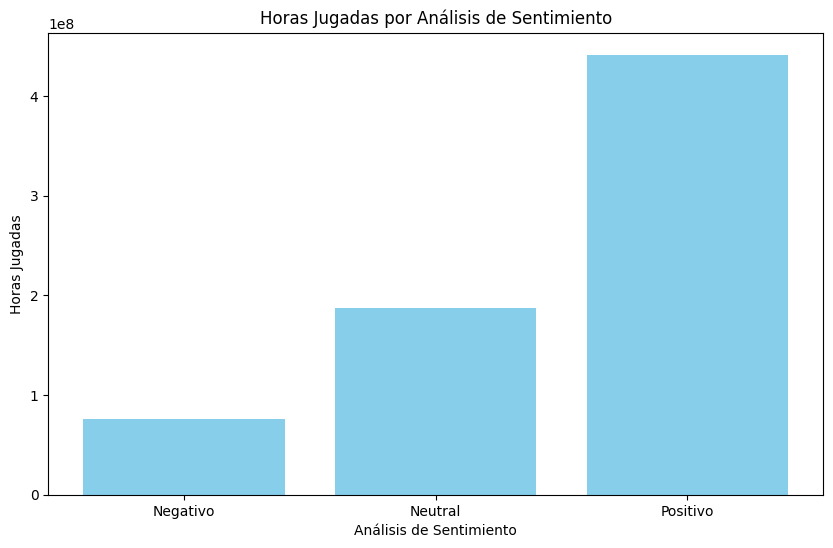

In [98]:
# Agrupamos los datos por la columna "sentiment_analysis" y sumamos las horas jugadas en cada categoría
sentiment_hours = df_items_reviews_games.groupby('sentiment_analysis')['playtime_forever'].sum()

# Crea un histograma de barras para mostrar las horas jugadas por categoría de sentimiento
plt.figure(figsize=(10, 6))
plt.bar(sentiment_hours.index, sentiment_hours.values, color='skyblue')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Horas Jugadas')
plt.title('Horas Jugadas por Análisis de Sentimiento')
plt.xticks(sentiment_hours.index, ['Negativo', 'Neutral', 'Positivo'])  # Etiquetas para las categorías
plt.show()

Seria logico decir que los usuarios al tener la primera experiencia negativa algunos dejan de jugar y pasan al los comentarios a dejar su reseña la cual es util para otros jugadores que igual tienden a pensar de esa forma.

Voy a probar utilizar el que aprenda por ALS ya que es usado para entrenar modelos de recomendación usando la biblioteca de pyspark

In [101]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [103]:
# Creamos una sesión de Spark
spark = SparkSession.builder.appName("Recommender").getOrCreate()

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.